In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from glob import glob
from configs import *
from tqdm import tqdm
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from dataset import *
from time import time
tqdm.monitor_interval = 0
import torch
import json
import torch.nn as nn
import numpy as np
torch.manual_seed(0)
np.random.seed(0)

In [8]:
ttypes = [
    'rnn',
#     'rnn_0',
    'linear',
]

In [21]:
def safe_add(obj, elem):
    if type(elem) == list:
        val = elem[-1]
    else:
        val = elem
    if val == val:
        obj.append(val)

def add_fcast(obj, elem):
    pass


fcasts = []
for model in ttypes:
    fcast = [dict(mape=[], mse=[]) for _ in range(5)]
    obj = dict(mape=[], mse=[])
    logs = glob('checkpoints/%s/*.json' % model)
    for log in logs:
        with open(log) as fl:
            meta = json.load(fl)
        safe_add(obj['mape'], meta['mape'])
        safe_add(obj['mse'], meta['mse'])
        if 'fcast' in meta:
            for ii, fc in enumerate(meta['fcast']):
                safe_add(fcast[ii]['mape'], fc['mape'])
                safe_add(fcast[ii]['mse'], fc['mse'])
        
    obj['mse'] = (np.mean(obj['mse']), np.var(obj['mse']))
    obj['mape'] = (np.mean(obj['mape']), np.var(obj['mape']))
    for fc in fcast:
        fc['mse'] = (np.mean(fc['mse']), np.var(fc['mse']))
        fc['mape'] = (np.mean(fc['mape']), np.var(fc['mape']))
    
    print(model)
    print(obj['mse'][0], obj['mse'][1])
    print(obj['mape'][0], obj['mape'][1])
    print(fcast[0]['mse'])
    fcasts.append(fcast)

rnn
3.255569877817352 11.716375476007396
33.82894182351334 305.26332075088277
(3.4095495235791518, 13.597156197298016)
linear
3.3773129818748386 13.001227272301023
33.40426948772812 247.47938367754458
(3.600472099474787, 15.095477998442078)


3.41, 3.43, 3.54, 3.64, 3.75
3.60, 3.61, 3.71, 3.81, 3.90


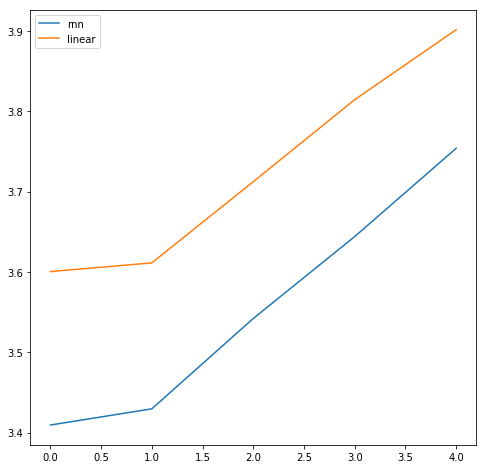

34.96, 35.87, 37.02, 37.73, 38.45
34.83, 34.79, 35.22, 35.36, 35.59


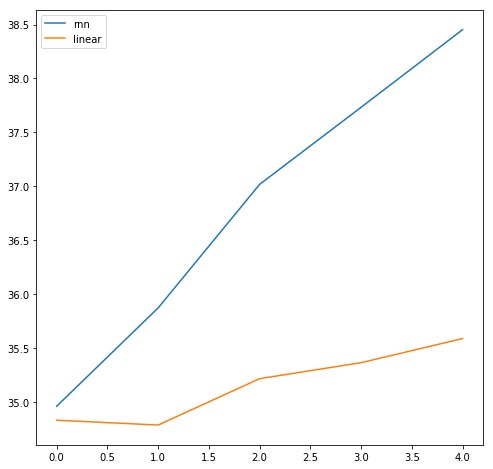

In [22]:
plt.figure(figsize=(8, 8))
for fcast in fcasts:
    pl = plt.plot([fcast[ii]['mse'][0] for ii in range(5)])
    print(', '.join(['%.2f' % fcast[ii]['mse'][0] for ii in range(5)]))
plt.legend(ttypes)
plt.show(); plt.close()


plt.figure(figsize=(8, 8))
for fcast in fcasts:
    pl = plt.plot([fcast[ii]['mape'][0] for ii in range(5)])
    print(', '.join(['%.2f' % fcast[ii]['mape'][0] for ii in range(5)]))
plt.legend(ttypes)
plt.show(); plt.close()